In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load dataset
df = pd.read_csv('/content/merged_data.csv')


<ipython-input-15-3096dbefb342>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_data.csv')


In [ ]:
df.head()


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [ ]:
df.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,589097.000000,589097.000000,589097.000000,589097.000000,589097.000000,589097.000000,589096.000000
mean,-32.586900,3.113255,36.431871,3.265097,83.723265,31.883296,1.215732
std,25.960219,30.417959,39.482423,4.727887,12.416869,2.451324,0.861165
min,-128.000000,-128.000000,-128.000000,0.000000,56.200000,28.350000,0.000000
25%,-53.000000,-8.000000,10.000000,0.343293,75.330000,29.090000,0.000000
50%,-35.000000,2.000000,39.000000,0.827840,81.770000,32.150000,2.000000
75%,-20.000000,17.000000,55.000000,4.023163,90.420000,34.090000,2.000000
max,127.000000,127.000000,127.000000,22.777302,134.800000,36.590000,2.000000


from matplotlib import pyplot as plt
_df_0['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Z'].plot(kind='hist', bins=20, title='Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['EDA'].plot(kind='hist', bins=20, title='EDA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Y', y='Z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Z', y='EDA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='EDA', y='HR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Z'].plot(kind='line', figsize=(8, 4), title='Z')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['EDA'].plot(kind='line', figsize=(8, 4), title='EDA')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589097 entries, 0 to 589096
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         589097 non-null  float64
 1   Y         589097 non-null  float64
 2   Z         589097 non-null  float64
 3   EDA       589097 non-null  float64
 4   HR        589097 non-null  float64
 5   TEMP      589097 non-null  float64
 6   id        589097 non-null  object 
 7   datetime  589097 non-null  object 
 8   label     589096 non-null  float64
dtypes: float64(7), object(2)
memory usage: 40.5+ MB


In [ ]:
df['X'] = df['X'].astype('float32')
df['Y'] = df['Y'].astype('float32')
df['Z'] = df['Z'].astype('float32')
df['EDA'] = df['EDA'].astype('float32')
df['HR'] = df['HR'].astype('float32')
df['TEMP'] = df['TEMP'].astype('float32')
df['label'] = df['label'].astype('float32')
# id is meaning less
df.drop(["id"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589097 entries, 0 to 589096
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         589097 non-null  float32
 1   Y         589097 non-null  float32
 2   Z         589097 non-null  float32
 3   EDA       589097 non-null  float32
 4   HR        589097 non-null  float32
 5   TEMP      589097 non-null  float32
 6   datetime  589097 non-null  object 
 7   label     589096 non-null  float32
dtypes: float32(7), object(1)
memory usage: 20.2+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
df['panic'] = df['label'].apply(lambda x: 1 if x == 2.0 else 0)
print(df['panic'].value_counts())

panic
1    295690
0    293407
Name: count, dtype: int64


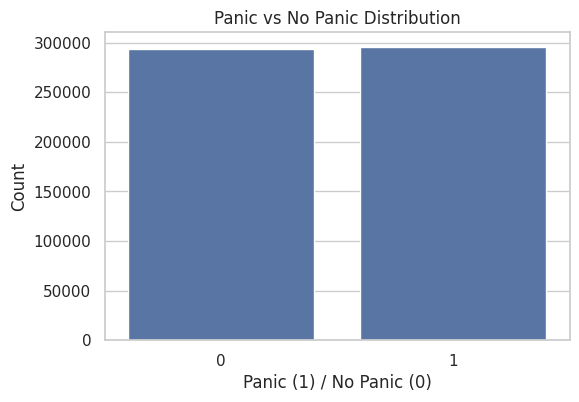

In [ ]:
#Class Distribution (Panic vs No Panic)
plt.figure(figsize=(6,4))
sns.countplot(x='panic', data=df)
plt.title("Panic vs No Panic Distribution")
plt.xlabel("Panic (1) / No Panic (0)")
plt.ylabel("Count")
plt.show()

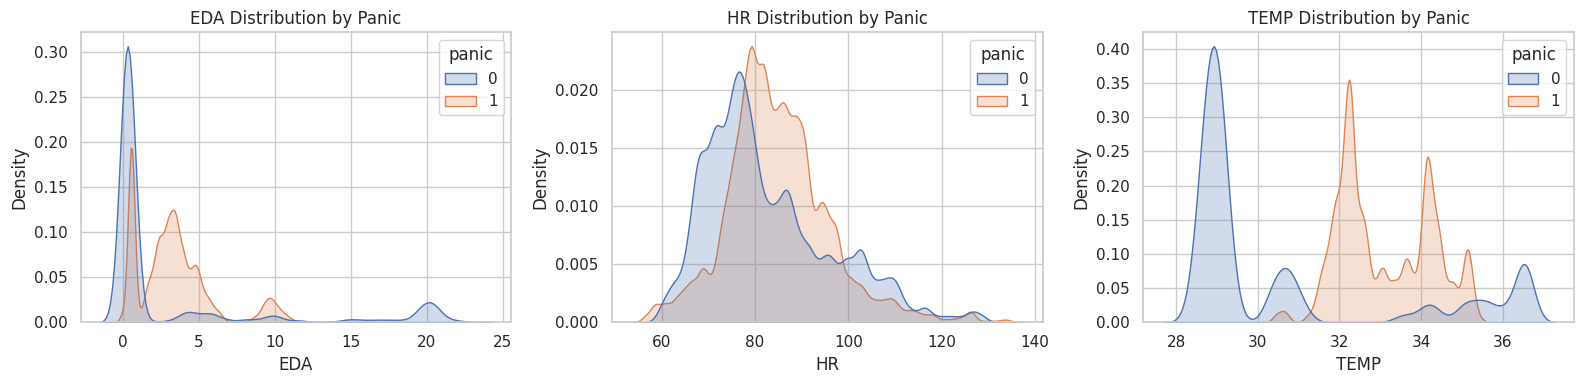

In [ ]:
physio_cols = ['EDA', 'HR', 'TEMP']
plt.figure(figsize=(16, 4))

for i, col in enumerate(physio_cols):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='panic', fill=True)
    plt.title(f'{col} Distribution by Panic')

plt.tight_layout()
plt.show()

EDA shows a clear distinction, making it a strong panic indicator.

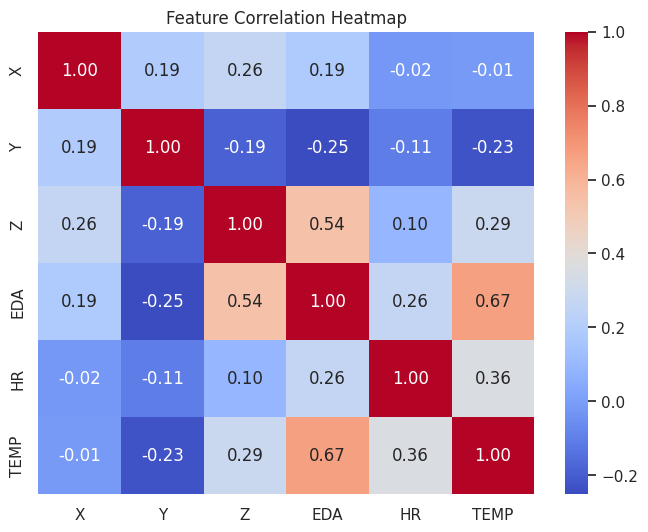

In [ ]:
plt.figure(figsize=(8, 6))
corr = df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

EDA and TEMP are the most strongly correlated, making them crucial features for panic detection.

HR has weak but meaningful correlations with both TEMP and EDA, making it a secondary indicator.

Z-axis movement is more related to physiological signals than X and Y, suggesting motion-based features could be useful.

In [ ]:
features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']
X = df[features]
y = df['panic']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[58514   168]
 [  178 58960]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58682
           1       1.00      1.00      1.00     59138

    accuracy                           1.00    117820
   macro avg       1.00      1.00      1.00    117820
weighted avg       1.00      1.00      1.00    117820



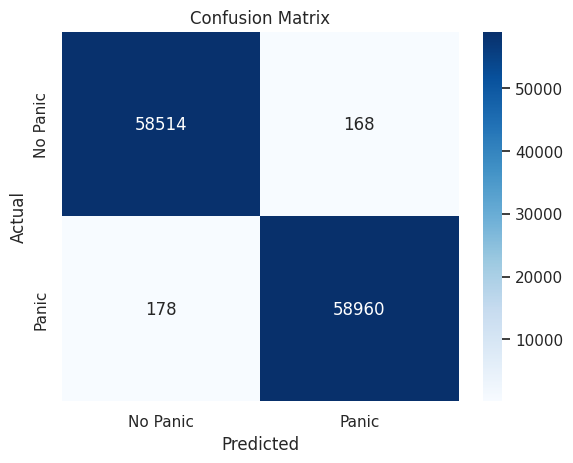

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Panic', 'Panic'],
            yticklabels=['No Panic', 'Panic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


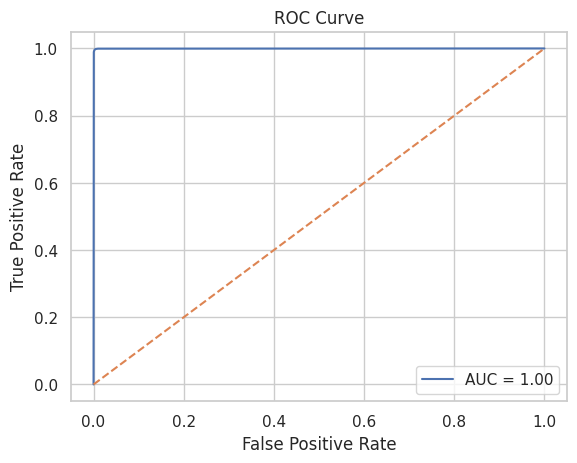

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# For KNN, use predict_proba
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


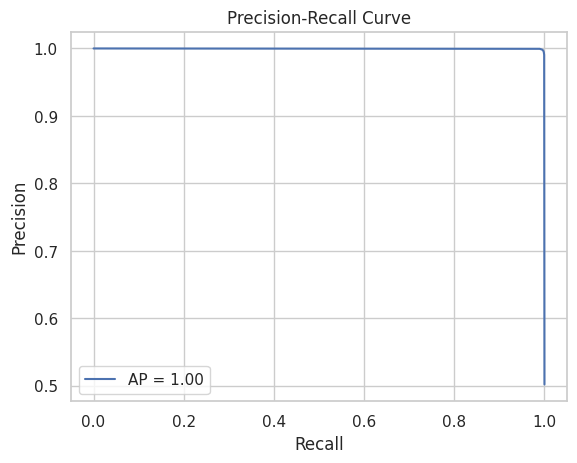

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.9970743916256574


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen’s Kappa:", kappa)


Cohen’s Kappa: 0.9941265497268238


In [ ]:
import joblib

joblib.dump(knn, 'knn_panic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']